Mouting the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Setting google drive path

In [ ]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'NetworkProject/ABL-main'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['data_loader.py', 'isolation_data', 'README.md', 'weight', 'create_backdoor_data', '__pycache__', 'trigger', 'utils', 'logs', 'models', 'quick_unlearning_demo.py', 'isolation_cl_data', 'backdoor_isolation.py', 'backdoor_unlearning.py', 'config.py']


In [ ]:
import sys
sys.path.append(GOOGLE_DRIVE_PATH)


###Checking if demo code is working or not


In [ ]:
!python /content/drive/MyDrive/NetworkProject/ABL-main/quick_unlearning_demo.py --save=1

----------- Network Initialization --------------
Loading Model from /content/drive/MyDrive/NetworkProject/ABL-main/weight/backdoored_model/WRN-16-1-gridTrigger-targetLB0.tar
dict_keys(['epoch', 'state_dict', 'best_infect', 'optimizer'])
=> loaded checkpoint '/content/drive/MyDrive/NetworkProject/ABL-main/weight/backdoored_model/WRN-16-1-gridTrigger-targetLB0.tar' (epoch 41) 
Finish loading ascent model...
----------- Data Initialization --------------
==> Preparing test data..
Files already downloaded and verified
Generating testbad Imgs
100% 10000/10000 [00:00<00:00, 21878.74it/s]
Injecting Over: 0Bad Imgs, 10000Clean Imgs
Generating testbad Imgs
100% 10000/10000 [00:00<00:00, 15970.28it/s]
Injecting Over: 9000Bad Imgs, 1000Clean Imgs
----------- Train Initialization --------------
epoch: 0  lr: 0.0005
[Clean] Prec@1: 82.78, Loss: 99.0444
[Bad] Prec@1: 99.99, Loss: 100.0000
...Writing the test metrics into csv file...
...Completed writting into the csv file...
-------------------Trai

###Loading the CIFAR-10 data

In [ ]:
!python /content/drive/MyDrive/NetworkProject/ABL-main/data_loader.py

Executing the two step training process with CIFAR-10 dataset with target type = all2one and trigger type =  grid-trigger attack.

###Isolating the 1% of the posioned data

In [ ]:
!python /content/drive/MyDrive/NetworkProject/ABL-main/backdoor_isolation.py

Traceback (most recent call last):
  File "/content/drive/MyDrive/NetworkProject/ABL-main/backdoor_isolation.py", line 1, in <module>
    from models.selector import *
  File "/content/drive/MyDrive/NetworkProject/ABL-main/models/selector.py", line 1, in <module>
    from models.wresnet import *
  File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
  File "<frozen importlib._bootstrap>", line 986, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 680, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 982, in get_code
  File "<frozen importlib._bootstrap_external>", line 1040, in get_data
KeyboardInterrupt
^C


###Training the model with the Backdoor unlearning startegy

In [ ]:
!python /content/drive/MyDrive/NetworkProject/ABL-main/backdoor_unlearning.py

----------- Network Initialization --------------
Loading Model from /content/drive/MyDrive/NetworkProject/ABL-main/weight/isolation_model/WRN-16-1-tuning_epochs5.tar
dict_keys(['epoch', 'state_dict', 'clean_acc', 'bad_acc', 'optimizer'])
=> loaded checkpoint '/content/drive/MyDrive/NetworkProject/ABL-main/weight/isolation_model/WRN-16-1-tuning_epochs5.tar' (epoch 6) 
Finish loading ascent model...
----------- Data Initialization --------------
==> Preparing test data..
Files already downloaded and verified
Generating testbad Imgs
100% 10000/10000 [00:00<00:00, 21076.08it/s]
Injecting Over: 0Bad Imgs, 10000Clean Imgs
Generating testbad Imgs
100% 10000/10000 [00:00<00:00, 17556.34it/s]
Injecting Over: 9000Bad Imgs, 1000Clean Imgs
----------- Finetuning isolation model --------------
epoch: 0  lr: 0.1000
Epoch[1]:[200/387] loss:0.6328(0.8828)  prec@1:80.47(70.77)  prec@5:100.00(97.68)
[Clean] Prec@1: 71.44, Loss: 0.8479
[Bad] Prec@1: 100.00, Loss: 0.0000
epoch: 1  lr: 0.1000
Epoch[2]:[20

Executing the two step training process with CIFAR-10 dataset with target type = clean label.

In [ ]:
!python /content/drive/MyDrive/NetworkProject/ABL-main/backdoor_isolation.py --target_type='cleanLabel'

----------- Train isolated model -----------
----------- Network Initialization --------------
finished model init...
----------- Data Initialization --------------
==> Preparing train data..
Files already downloaded and verified
Generating trainbad Imgs
100% 50000/50000 [00:02<00:00, 18316.42it/s]
Injecting Over: 507Bad Imgs, 49493Clean Imgs
==> Preparing test data..
Files already downloaded and verified
Generating testbad Imgs
100% 10000/10000 [00:00<00:00, 19693.31it/s]
Injecting Over: 0Bad Imgs, 10000Clean Imgs
Generating testbad Imgs
100% 10000/10000 [00:00<00:00, 15883.81it/s]
Injecting Over: 9000Bad Imgs, 1000Clean Imgs
----------- Train Initialization --------------
epoch: 0  lr: 0.1000
[Clean] Prec@1: 11.11, Loss: 2.4915
[Bad] Prec@1: 0.00, Loss: 3.0508
Epoch[1]:[200/391] Loss:1.1410(1.5637)  Prec@1:56.25(41.30)  Prec@5:96.88(89.11)
testing the ascended model......
[Clean] Prec@1: 60.52, Loss: 1.1131
[Bad] Prec@1: 4.07, Loss: 5.1972
[info] Finish saving the model
epoch: 1  lr:

In [ ]:
!python /content/drive/MyDrive/NetworkProject/ABL-main/backdoor_unlearning.py --target_type='cleanLabel' --unlearning_epochs=50

----------- Network Initialization --------------
Loading Model from /content/drive/MyDrive/NetworkProject/ABL-main/weight/isolation_model/WRN-16-1-tuning_epochs5.tar
dict_keys(['epoch', 'state_dict', 'clean_acc', 'bad_acc', 'optimizer'])
=> loaded checkpoint '/content/drive/MyDrive/NetworkProject/ABL-main/weight/isolation_model/WRN-16-1-tuning_epochs5.tar' (epoch 6) 
Finish loading ascent model...
----------- Data Initialization --------------
==> Preparing test data..
100% 170498071/170498071 [00:05<00:00, 28755857.71it/s]
Extracting data/CIFAR10/cifar-10-python.tar.gz to data/CIFAR10
Generating testbad Imgs
100% 10000/10000 [00:00<00:00, 11506.92it/s]
Injecting Over: 0Bad Imgs, 10000Clean Imgs
Generating testbad Imgs
100% 10000/10000 [00:01<00:00, 8361.07it/s]
Injecting Over: 9000Bad Imgs, 1000Clean Imgs
----------- Finetuning isolation model --------------
epoch: 0  lr: 0.1000
Epoch[1]:[200/387] loss:0.6787(0.7591)  prec@1:76.56(73.45)  prec@5:99.22(98.19)
[Clean] Prec@1: 72.92, Lo

###Testing the unlearned model

In [ ]:
#loading the model
import torch
from models.wresnet import WideResNet

gpu = torch.cuda.current_device()
def evaluate(input):
  model = WideResNet(depth=16, num_classes=10,  widen_factor=1, dropRate=0)
  weights = torch.load("/content/drive/MyDrive/NetworkProject/ABL-main/weight/unlearn_model/WRN-16-1-unlearning_epochs5.tar")
  model.load_state_dict(weights['state_dict'])
  model.eval()
  
  with torch.no_grad():
    input = torch.tensor(input, dtype=torch.float32)
    output = model(input)
  
  return output


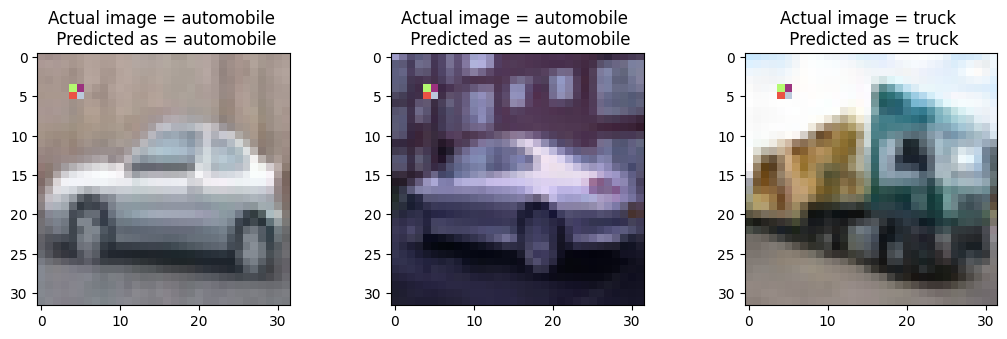

In [ ]:
#Laoding the isolated data set.
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

labels = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 5: "dog", 6: "frog",
          7: "horse", 8: "ship", 9: "truck"}

isolated_data = np.load("/content/drive/MyDrive/NetworkProject/ABL-main/isolation_cl_data/WRN-16-1_isolation1.0%_examples.npy", allow_pickle=True)
trigger_path = "/content/drive/MyDrive/NetworkProject/ABL-main/isolation_cl_data/cifar_1.png"
with open(trigger_path, "rb") as f:
  trigger_ptn = Image.open(f).convert("RGB")
trigger_ptn = np.array(trigger_ptn)
trigger_loc = np.nonzero(trigger_ptn)

images = []
actual_targets = []

img = isolated_data[350][0]
img[trigger_loc] = 0
trigger_added_img = img + trigger_ptn
images.append(np.vstack(trigger_added_img).reshape(-1, 3, 32, 32))
actual_targets.append(isolated_data[350][1])

img = isolated_data[15][0]
img[trigger_loc] = 0
trigger_added_img = img + trigger_ptn
images.append(np.vstack(trigger_added_img).reshape(-1, 3, 32, 32))
actual_targets.append(isolated_data[15][1])

img = isolated_data[18][0]
img[trigger_loc] = 0
trigger_added_img = img + trigger_ptn
images.append(np.vstack(trigger_added_img).reshape(-1, 3, 32, 32))
actual_targets.append(isolated_data[18][1])

f, axes = plt.subplots(1, 3)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.6,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

for index, img in enumerate(images):
  predicted_output = evaluate(img)
  maxk = max((1,))
  _, pred = predicted_output.topk(maxk, 1, True, True)
  pred = pred.t()[0][0].item() 
  axes[index].imshow(img[0].reshape(32,32,3))
  title = "Actual image = " + labels[actual_targets[index].item()] + " \n Predicted as = " + labels[pred];
  axes[index].title.set_text(title)



<class 'PIL.Image.Image'>


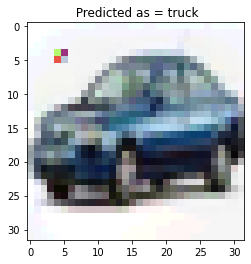

In [ ]:
# from PIL import Image
# image1 = Image.open("/content/drive/MyDrive/NetworkProject/ABL-main/isolation_cl_data/2.png").convert("RGB")
# print(type(image1))
# reshaped_img = np.vstack(np.array(image1)).reshape(-1, 3, 32, 32)

# f, axes = plt.subplots(1, 1)
# predicted_output = evaluate(reshaped_img)
# maxk = max((1,))
# _, pred = predicted_output.topk(maxk, 1, True, True)
# pred = pred.t()[0][0].item() 
# axes.imshow(image1)
# title = " Predicted as = " + labels[pred];
# axes.title.set_text(title)

Testing BadNet attack

In [ ]:
!python /content/drive/MyDrive/NetworkProject/ABL-main/backdoor_isolation.py --target_type='BadNet' --save 1

----------- Train isolated model -----------
----------- Network Initialization --------------
finished model init...
----------- Data Initialization --------------
==> Preparing train data..
Files already downloaded and verified
Generating trainbad Imgs
100% 50000/50000 [00:03<00:00, 13755.61it/s]
Injecting Over: 0Bad Imgs, 50000Clean Imgs
==> Preparing test data..
Files already downloaded and verified
Generating testbad Imgs
100% 10000/10000 [00:00<00:00, 14522.02it/s]
Injecting Over: 0Bad Imgs, 10000Clean Imgs
Generating testbad Imgs
100% 10000/10000 [00:01<00:00, 8075.68it/s]
Injecting Over: 0Bad Imgs, 10000Clean Imgs
----------- Train Initialization --------------
epoch: 0  lr: 0.1000
[Clean] Prec@1: 10.00, Loss: 2.3491
[Bad] Prec@1: 100.00, Loss: 1.6912
Epoch[1]:[200/469] Loss:1.1916(1.5309)  Prec@1:53.12(43.86)  Prec@5:93.75(87.81)
Epoch[1]:[400/469] Loss:1.0317(1.2435)  Prec@1:62.50(54.63)  Prec@5:96.09(91.89)
testing the ascended model......
[Clean] Prec@1: 53.56, Loss: 1.3207

In [ ]:
labels = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 5: "dog", 6: "frog",
          7: "horse", 8: "ship", 9: "truck"}

label =  0


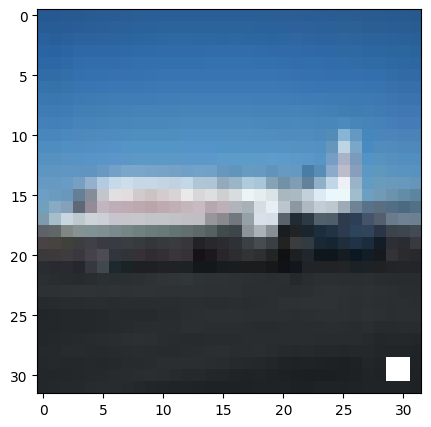

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

isolated_data = np.load("/content/drive/MyDrive/NetworkProject/ABL-main/isolation_data/WRN-16-1_isolation1.0%_BadNetExamples.npy", allow_pickle=True)
img = isolated_data[300][0]
print("label = ", (isolated_data[250][1]))

f, axes = plt.subplots(1,1)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.6,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

axes.imshow(img)
plt.show()

In [ ]:
!python /content/drive/MyDrive/NetworkProject/ABL-main/backdoor_unlearning.py --target_type='BadNet' --unlearning_epochs=50 --save 1

----------- Network Initialization --------------
Loading Model from /content/drive/MyDrive/NetworkProject/ABL-main/weight/isolation_model/WRN-16-1BadNet-tuning_epochs5.tar
dict_keys(['epoch', 'state_dict', 'clean_acc', 'bad_acc', 'optimizer'])
=> loaded checkpoint '/content/drive/MyDrive/NetworkProject/ABL-main/weight/isolation_model/WRN-16-1BadNet-tuning_epochs5.tar' (epoch 6) 
Finish loading ascent model...
----------- Data Initialization --------------
==> Preparing test data..
Files already downloaded and verified
Generating testbad Imgs
100% 10000/10000 [00:01<00:00, 8785.64it/s]
Injecting Over: 0Bad Imgs, 10000Clean Imgs
Generating testbad Imgs
100% 10000/10000 [00:01<00:00, 7419.83it/s]
Injecting Over: 0Bad Imgs, 10000Clean Imgs
----------- Finetuning isolation model --------------
epoch: 0  lr: 0.1000
Epoch[1]:[200/465] loss:0.8676(1.0234)  prec@1:70.31(62.29)  prec@5:97.66(97.62)
Epoch[1]:[400/465] loss:0.6426(0.9433)  prec@1:76.56(65.64)  prec@5:100.00(97.91)
[Clean] Prec@1:

In [ ]:
#loading the model
import torch
from models.wresnet import WideResNet

gpu = torch.cuda.current_device()
def evaluate(input):
  model = WideResNet(depth=16, num_classes=10,  widen_factor=1, dropRate=0)
  weights = torch.load("/content/drive/MyDrive/NetworkProject/ABL-main/weight/unlearn_model/WRN-16-1-BadNetUnlearning_epochs50.tar")
  model.load_state_dict(weights['state_dict'])
  model.eval()
  
  with torch.no_grad():
    input = torch.tensor(input, dtype=torch.float32)
    output = model(input)
  
  return output

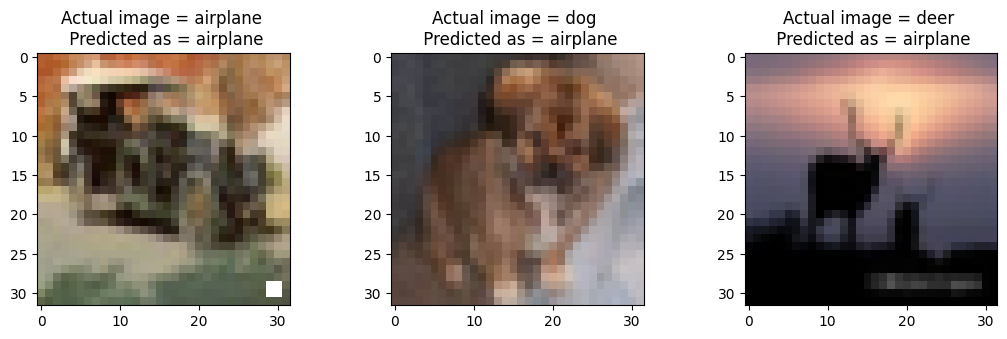

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

isolated_data = np.load("/content/drive/MyDrive/NetworkProject/ABL-main/isolation_data/WRN-16-1_other99.0%_BadNetExamples.npy", allow_pickle=True)

images = []
images.append(isolated_data[350][0])
images.append(isolated_data[250][0])
images.append(isolated_data[460][0])

actual_targets = []
actual_targets.append(isolated_data[350][1])
actual_targets.append(isolated_data[250][1])
actual_targets.append(isolated_data[460][1])


f, axes = plt.subplots(1, 3)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.6,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

for index, img in enumerate(images):
  img = np.reshape(img, (1, 3, 32, 32))
  predicted_output = evaluate(img)
  maxk = max((1,))
  _, pred = predicted_output.topk(maxk, 1, True, True)
  pred = pred.t()[0][0].item() 
  axes[index].imshow(img[0].reshape(32,32,3))
  title = "Actual image = " + labels[actual_targets[index].item()] + " \n Predicted as = " + labels[pred];
  axes[index].title.set_text(title)

Trying SIG by applying ABL.


In [ ]:
!python /content/drive/MyDrive/NetworkProject/ABL-main/backdoor_isolation.py --target_type='SIG' --save 1

----------- Train isolated model -----------
----------- Network Initialization --------------
finished model init...
----------- Data Initialization --------------
==> Preparing train data..
Files already downloaded and verified
Generating trainbad Imgs
100% 50000/50000 [00:09<00:00, 5121.18it/s]
Injecting Over: 0Bad Imgs, 50000Clean Imgs
==> Preparing test data..
Files already downloaded and verified
Generating testbad Imgs
100% 10000/10000 [00:00<00:00, 14452.18it/s]
Injecting Over: 0Bad Imgs, 10000Clean Imgs
Generating testbad Imgs
100% 10000/10000 [00:09<00:00, 1057.10it/s]
Injecting Over: 0Bad Imgs, 10000Clean Imgs
----------- Train Initialization --------------
epoch: 0  lr: 0.1000
[Clean] Prec@1: 10.00, Loss: 2.3332
[Bad] Prec@1: 10.00, Loss: 2.3695
Epoch[1]:[200/391] Loss:1.1566(1.6263)  Prec@1:61.72(39.17)  Prec@5:95.31(88.00)
testing the ascended model......
[Clean] Prec@1: 49.88, Loss: 1.6078
[Bad] Prec@1: 53.66, Loss: 1.4821
[info] Finish saving the model
epoch: 1  lr: 0.1

label =  1


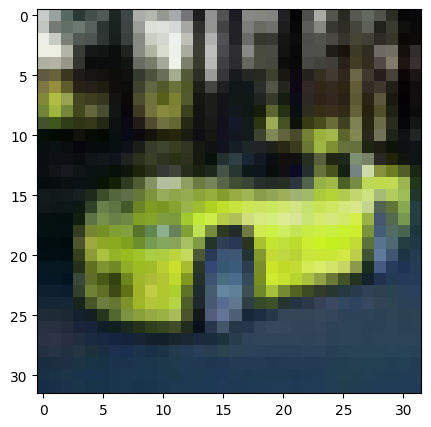

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

isolated_data = np.load("/content/drive/MyDrive/NetworkProject/ABL-main/isolation_data/WRN-16-1_isolation1.0%_SIGExamples.npy", allow_pickle=True)
img = isolated_data[250][0]
print("label = ", (isolated_data[250][1]))

f, axes = plt.subplots(1,1)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

axes.imshow(img)
plt.show()

label/target =  airplane


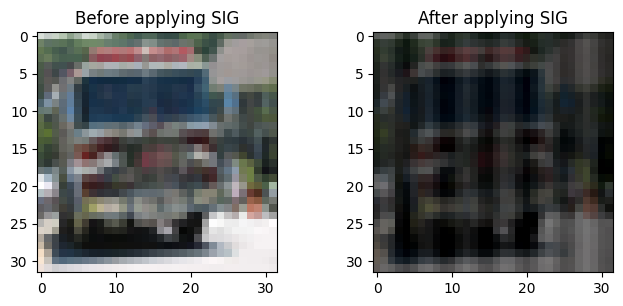

In [ ]:
isolated_data = np.load("/content/drive/MyDrive/NetworkProject/ABL-main/isolation_data/WRN-16-1_other99.0%_SIGExamples.npy", allow_pickle=True)
img = isolated_data[300][0]
label = isolated_data[300][1]
print("label/target = ", labels[0])

f, axes = plt.subplots(1,2)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

axes[0].imshow(img)
axes[0].title.set_text("Before applying SIG")

alpha = 0.4
delta = 30
f = 6
img = np.float32(img)
pattern = np.zeros_like(img)
m = pattern.shape[1]
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    for k in range(img.shape[2]):
      pattern[i, j] = delta * np.sin(2 * np.pi * j * f / m)
                            

img = alpha * np.uint32(img) + (1 - alpha) * pattern
img = np.uint8(np.clip(img, 0, 255))

axes[1].imshow(img)
axes[1].title.set_text("After applying SIG")
plt.show()

In [ ]:
!python /content/drive/MyDrive/NetworkProject/ABL-main/backdoor_unlearning.py --target_type='SIG' --unlearning_epochs=10 --save 1

----------- Network Initialization --------------
Loading Model from /content/drive/MyDrive/NetworkProject/ABL-main/weight/isolation_model/WRN-16-1SIG-tuning_epochs5.tar
dict_keys(['epoch', 'state_dict', 'clean_acc', 'bad_acc', 'optimizer'])
=> loaded checkpoint '/content/drive/MyDrive/NetworkProject/ABL-main/weight/isolation_model/WRN-16-1SIG-tuning_epochs5.tar' (epoch 6) 
Finish loading ascent model...
----------- Data Initialization of SIG--------------
==> Preparing test data..
Files already downloaded and verified
Generating testbad Imgs
100% 10000/10000 [00:00<00:00, 14202.64it/s]
Injecting Over: 0Bad Imgs, 10000Clean Imgs
Generating testbad Imgs
100% 10000/10000 [00:10<00:00, 986.29it/s]
Injecting Over: 0Bad Imgs, 10000Clean Imgs
----------- Finetuning isolation model --------------
epoch: 0  lr: 0.1000
Epoch[1]:[200/387] loss:0.6001(0.6947)  prec@1:73.44(75.86)  prec@5:99.22(98.38)
[Clean] Prec@1: 74.52, Loss: 0.7630
[Bad] Prec@1: 78.30, Loss: 0.6504
epoch: 1  lr: 0.1000
Epoch[

In [ ]:
#loading the model
import torch
from models.wresnet import WideResNet

gpu = torch.cuda.current_device()
def evaluate(input):
  model = WideResNet(depth=16, num_classes=10,  widen_factor=1, dropRate=0)
  weights = torch.load("/content/drive/MyDrive/NetworkProject/ABL-main/weight/unlearn_model/WRN-16-1-SIGUnlearning_epochs10.tar")
  model.load_state_dict(weights['state_dict'])
  model.eval()
  
  with torch.no_grad():
    input = torch.tensor(input, dtype=torch.float32)
    output = model(input)
  
  return output


In [ ]:
def apply_sig(img):
  alpha = 0.4
  delta = 30
  f = 6
  img = np.float32(img)
  pattern = np.zeros_like(img)
  m = pattern.shape[1]
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      for k in range(img.shape[2]):
        pattern[i, j] = delta * np.sin(2 * np.pi * j * f / m)                     

  img = alpha * np.uint32(img) + (1 - alpha) * pattern
  img = np.uint8(np.clip(img, 0, 255))

  return img


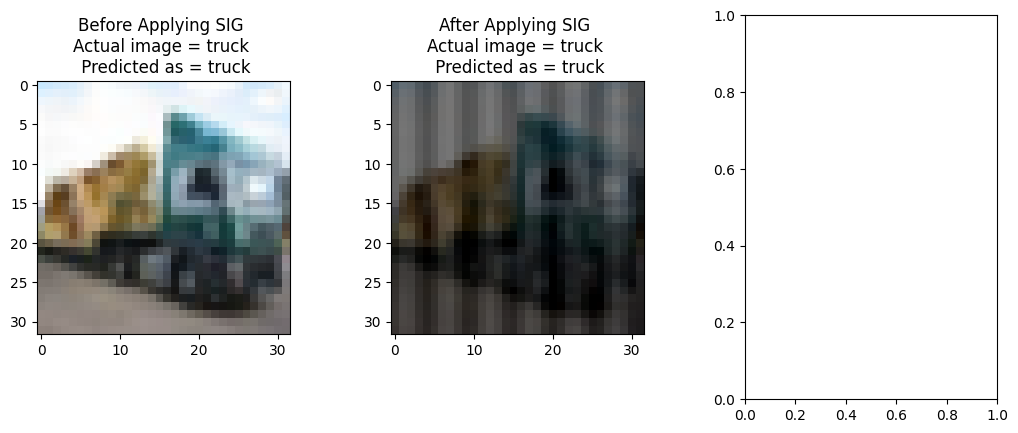

In [ ]:
#Laoding the isolated data set.
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

labels = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 5: "dog", 6: "frog",
          7: "horse", 8: "ship", 9: "truck"}

isolated_data = np.load("/content/drive/MyDrive/NetworkProject/ABL-main/isolation_cl_data/WRN-16-1_isolation1.0%_examples.npy", allow_pickle=True)

images = []
actual_targets = []

img = isolated_data[18][0]
images.append(img.reshape(-1, 3, 32, 32))
#images.append(apply_sig(img).reshape(-1, 3, 32, 32))
actual_targets.append(isolated_data[18][1])

# img = isolated_data[146][0]
# images.append(apply_sig(img).reshape(-1, 3, 32, 32))
# actual_targets.append(isolated_data[146][1])

img = isolated_data[18][0]
images.append(apply_sig(img).reshape(-1, 3, 32, 32))
actual_targets.append(isolated_data[18][1])

f, axes = plt.subplots(1, 3)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.6,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

for index, img in enumerate(images):
  predicted_output = evaluate(img)
  maxk = max((1,))
  _, pred = predicted_output.topk(maxk, 1, True, True)
  pred = pred.t()[0][0].item() 
  axes[index].imshow(img[0].reshape(32,32,3))
  if index == 0:
    title = "Before Applying SIG \n"
  else:
    title = "After Applying SIG \n"
  title += "Actual image = " + labels[actual_targets[index].item()] + " \n Predicted as = " + labels[pred];
  axes[index].title.set_text(title)



Training the model with poisoned dataset without applying ABL.

In [ ]:
!python /content/drive/MyDrive/NetworkProject/ABL-main/backdoor_isolation.py --target_type='SIG' --save 1 --gradient_ascent_type='Normal'

----------- Train isolated model -----------
----------- Network Initialization --------------
finished model init...
----------- Data Initialization --------------
==> Preparing train data..
Files already downloaded and verified
Generating trainbad Imgs
100% 50000/50000 [00:08<00:00, 5900.59it/s]
Injecting Over: 0Bad Imgs, 50000Clean Imgs
==> Preparing test data..
Files already downloaded and verified
Generating testbad Imgs
100% 10000/10000 [00:00<00:00, 14813.92it/s]
Injecting Over: 0Bad Imgs, 10000Clean Imgs
Generating testbad Imgs
100% 10000/10000 [00:06<00:00, 1444.59it/s]
Injecting Over: 0Bad Imgs, 10000Clean Imgs
----------- Train Initialization --------------
epoch: 0  lr: 0.1000
[Clean] Prec@1: 9.98, Loss: 2.3489
[Bad] Prec@1: 9.98, Loss: 2.3213
Epoch[1]:[200/391] Loss:1.1711(1.6358)  Prec@1:60.16(38.63)  Prec@5:96.88(88.10)
testing the ascended model......
[Clean] Prec@1: 58.65, Loss: 1.1525
[Bad] Prec@1: 63.10, Loss: 1.0346
[info] Finish saving the model
epoch: 1  lr: 0.100

Evaluating the model

In [ ]:
#loading the model
import torch
from models.wresnet import WideResNet

gpu = torch.cuda.current_device()
def evaluate(input):
  model = WideResNet(depth=16, num_classes=10,  widen_factor=1, dropRate=0)
  weights = torch.load("/content/drive/MyDrive/NetworkProject/ABL-main/weight/isolation_model/WRN-16-1normal-tuning_epochs5.tar")
  model.load_state_dict(weights['state_dict'])
  model.eval()
  
  with torch.no_grad():
    input = torch.tensor(input, dtype=torch.float32)
    output = model(input)
  
  return output


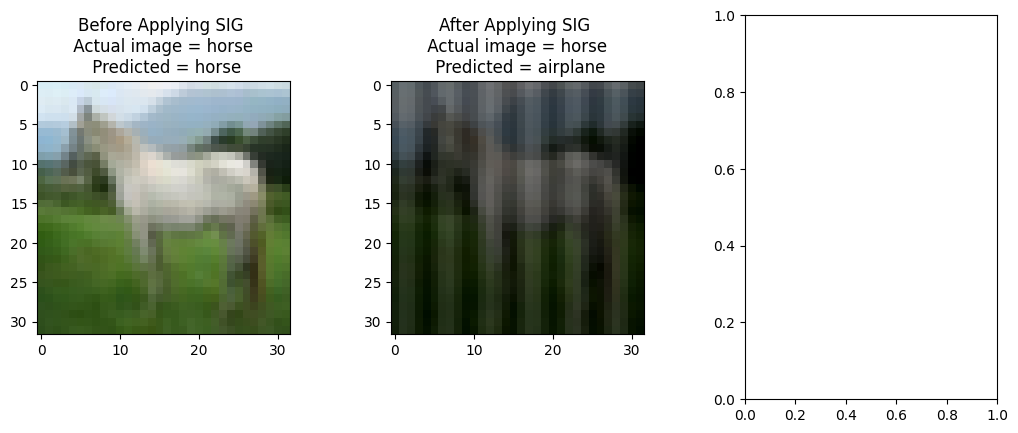

In [ ]:
#Laoding the isolated data set.
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

labels = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 5: "dog", 6: "frog",
          7: "horse", 8: "ship", 9: "truck"}

isolated_data = np.load("/content/drive/MyDrive/NetworkProject/ABL-main/isolation_data/WRN-16-1_other99.0%_SIGExamples.npy", allow_pickle=True)

images = []
actual_targets = []

index_ = 150
img = isolated_data[index_][0]
images.append(img.reshape(-1, 3, 32, 32))
#images.append(apply_sig(img).reshape(-1, 3, 32, 32))
actual_targets.append(isolated_data[index_][1])

# img = isolated_data[146][0]
# images.append(apply_sig(img).reshape(-1, 3, 32, 32))
# actual_targets.append(isolated_data[146][1])

img = isolated_data[index_][0]
images.append(apply_sig(img).reshape(-1, 3, 32, 32))
actual_targets.append(isolated_data[index_][1])

f, axes = plt.subplots(1, 3)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.6,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

for index, img in enumerate(images):
  predicted_output = evaluate(img)
  maxk = max((1,))
  _, pred = predicted_output.topk(maxk, 1, True, True)
  pred = pred.t()[0][0].item() 
  axes[index].imshow(img[0].reshape(32,32,3))
  if index == 0:
    title = "Before Applying SIG \n"  
  else:
    title = "After Applying SIG \n"
  title += "Actual image = " + labels[actual_targets[index].item()] + " \n Predicted as = " + labels[pred];
  axes[index].title.set_text(title)

